In [ ]:
!pip install noisereduce
import torch
import torch.nn as nn
import torch.optim as optim
import librosa
import librosa.display
import numpy as np
import os
import IPython.display as ipd
import noisereduce as nr
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU

In [ ]:
device = None
dtype = torch.float32
if torch.cuda.is_available():
  device = torch.device('cuda')
else: device = torch.device('cpu')

In [ ]:
!git clone https://github.com/soerenab/AudioMNIST.git

Cloning into 'AudioMNIST'...
remote: Enumerating objects: 30119, done.
remote: Total 30119 (delta 0), reused 0 (delta 0), pack-reused 30119
Receiving objects: 100% (30119/30119), 944.54 MiB | 23.83 MiB/s, done.
Resolving deltas: 100% (26/26), done.
Checking out files: 100% (30018/30018), done.


In [ ]:
!pip install torchaudio
import torchaudio
import matplotlib.pyplot as plt

     |████████████████████████████████| 1.9 MB 4.9 MB/s 


In [ ]:
'''
audio = []
dir = 'AudioMNIST/data/'
#dir = 'free-spoken-digit-dataset/recordings'

for (root,dirs,files) in os.walk(dir):
  for file in files:
    if file.endswith('.wav'):
      path = root+'/'+file
      audio.append(path) #appends [data, sampling rate to audio]
      print(path)
    
 '''     

"\naudio = []\ndir = 'AudioMNIST/data/'\n#dir = 'free-spoken-digit-dataset/recordings'\n\nfor (root,dirs,files) in os.walk(dir):\n  for file in files:\n    if file.endswith('.wav'):\n      path = root+'/'+file\n      audio.append(path) #appends [data, sampling rate to audio]\n      print(path)\n    \n "

In [ ]:
from tensorflow import keras

In [ ]:
#audio
#keras.utils.to_categorical

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import sys
from matplotlib import cm

class DataGenerator:
  def __init__(self, dataset, max_len = 40):
    if dataset == "AudioMNIST":
      path = 'AudioMNIST/data/'
    elif dataset == 'freespeak': path = 'free-spoken-digit-dataset/recordings'
    self.path = path
    self.dataset = dataset;
    self.max_len = max_len
    print(path)

  def process_audio(self, file, root = None):
    '''
    returns audio's mfccs: 
    '''
    max_len = self.max_len;
    if root is None:
      path = os.path.join(self.path, file)
    else:
      path = os.path.join(root, file)
    wave, sr = librosa.load(path, mono=True, sr=None)
    wave = wave[::3]
    mfcc = librosa.feature.mfcc(wave, sr=8000)
    #chroma_stft = librosa.feature.chroma_stft(wave, sr=8000)
    
    pad_width = max_len - mfcc.shape[1]
    mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')

    #pad_width_chroma_stft = max_len - chroma_stft.shape[1]
    #chroma_stft = np.pad(chroma_stft, pad_width=((0, 8), (0, pad_width_chroma_stft)), mode='constant')
    return mfcc
    #wave, sr = torchaudio.load_wav(path)
    # shifting to pytorch
    # mel = torchaudio.transform.MelSpectrogram(wave, )
    # pad_width = max_len - mel.shape[1]
    # mel_padded = 

    # return mel_padded

  def __get_data(self):
    '''returns audio files after extracting mfc features and categorical labels'''
    label = []
    data = []
    dir = self.path
    i=0
    
    for (root,dirs,files) in os.walk(dir):
      for file in files:
        i+=1
        if file.endswith('.wav'):
          data.append(self.process_audio(file, root = root))
          
          label.append(file.split('_')[0][0])
          sys.stdout.write("\rDoing thing %i" % i)
          sys.stdout.flush()
    return np.asarray(data), keras.utils.to_categorical(label)

  def get_data(self, test_size = 0.1, val_size = 0.1):
    data, labels = self.__get_data()
    X, X_test, y, y_test = train_test_split(data, labels, test_size=test_size, random_state = 1)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=val_size, random_state = 2)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [ ]:
#dataset = DataGenerator('AudioMNIST') 

#X_train, X_val, X_test, y_train, y_val, y_test = dataset.get_data(test_size = 0.1, val_size = 0.111)

In [ ]:
import pickle

In [ ]:
'''
data = {
    'X_train': X_train, 'y_train': y_train,
    'X_test': X_test, 'y_test':y_test,
    'X_val': X_val, 'y_val': y_val
}
for key in data.keys():
  mat = data[key]
  pickle.dump( mat, open( "Data/"+key+".pkl", "wb" ) )
'''

'\ndata = {\n    \'X_train\': X_train, \'y_train\': y_train,\n    \'X_test\': X_test, \'y_test\':y_test,\n    \'X_val\': X_val, \'y_val\': y_val\n}\nfor key in data.keys():\n  mat = data[key]\n  pickle.dump( mat, open( "Data/"+key+".pkl", "wb" ) )\n'

In [ ]:
#new_data = pickle.load(open('Data/X_train.pkl', 'rb'))
#new_data = np.reshape(new_data, (2000, 20, 20))
#assert (new_data == X_train).all()

In [ ]:
#!zip -r file.zip Data
#from google.colab import files
#files.download("file.zip")

In [ ]:
#For loading data from colab

import pickle
data={}
keys = 'X_train, X_val, X_test, y_train, y_val, y_test'.split(', ')
for key in keys:
  path = '/content/drive/MyDrive/Stride/Data/' #"Data/"
  mat = pickle.load( open( path +key+".pkl", "rb" ) )
  data.update({key : mat} )

X_train, X_val, X_test, y_train, y_val, y_test = [y for y in data.values()]


In [ ]:
X_train.shape


(24003, 20, 40)

In [ ]:

def get_cnn_model(input_shape, num_classes, d = 0.3):
  model = Sequential()
  #model.add(Input(shape= (20,20,1) ))
  #conv
  model.add(Conv2D(64, kernel_size=2,  input_shape = input_shape)) #18
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.05))
  model.add(Dropout(d))
  #conv
  model.add(Conv2D(64, kernel_size=2,strides = 2)) #16
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.05))
  model.add(Dropout(d))
  #pool
  model.add(Conv2D(128, kernel_size=2, strides = 2)) #8
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.05))
  model.add(Dropout(d))
  #conv
  model.add(Conv2D(128, kernel_size=2, padding = 'same',activity_regularizer=keras.regularizers.L2(0.01))) #8
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.05))
  model.add(Dropout(d))
  #conv
  model.add(Conv2D(256, kernel_size=2, padding = 'same',activity_regularizer=keras.regularizers.L2(0.01))) #8
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.05))
  model.add(Dropout(d))
  #pool
  model.add(Conv2D(256, kernel_size=2,name='feature_layer')) #2
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.05))
  model.add(Dropout(d))

  model.add(Flatten())
  #2 x FC
  model.add(Dense(256))
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.05))
  model.add(Dropout(d))
  model.add(Dense(100))
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.05))
  model.add(Dropout(d))
  model.add(Dense(num_classes, activation='softmax'))

  #model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
  
  return model


In [ ]:
#model params and minor reshaping
dim = X_train.shape[1]
assert dim == 20
channels =1
X_train = X_train.reshape((X_train.shape[0], dim, 40, channels))
X_val = X_val.reshape((X_val.shape[0], dim, 40, channels))
X_test = X_test.reshape((X_test.shape[0], dim, 40, channels))
input_shape = (dim, 40, 1)
classes = 10

In [ ]:
X_train.shape
model = keras.models.load_model('/content/drive/MyDrive/Stride/final_model_regularized')

In [ ]:
#import keras
#from keras.optimizers import Adam
mean = np.mean(X_train)
X_train -= mean
X_val -=  mean
X_test -= mean

In [ ]:
model = get_cnn_model(input_shape, classes) #, 0.4
opt = keras.optimizers.Adam(learning_rate=1e-3)#, decay = 0.95)
# model.compile(optimizer=opt,
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt, metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=64, epochs=50, 
                    validation_data=(X_val, y_val), verbose = 1)

Epoch 1/50
376/376 [==============================] - 14s 30ms/step - loss: 5.4503 - accuracy: 0.5356 - val_loss: 4.3992 - val_accuracy: 0.0981
Epoch 2/50
376/376 [==============================] - 11s 28ms/step - loss: 0.7743 - accuracy: 0.8841 - val_loss: 0.5162 - val_accuracy: 0.8519
Epoch 3/50
376/376 [==============================] - 11s 28ms/step - loss: 0.4702 - accuracy: 0.9153 - val_loss: 0.3592 - val_accuracy: 0.9059
Epoch 4/50
376/376 [==============================] - 10s 28ms/step - loss: 0.3352 - accuracy: 0.9343 - val_loss: 0.1861 - val_accuracy: 0.9626
Epoch 5/50
376/376 [==============================] - 11s 28ms/step - loss: 0.3895 - accuracy: 0.9321 - val_loss: 0.1271 - val_accuracy: 0.9840
Epoch 6/50
376/376 [==============================] - 10s 28ms/step - loss: 0.2699 - accuracy: 0.9465 - val_loss: 0.2458 - val_accuracy: 0.9373
Epoch 7/50
376/376 [==============================] - 10s 28ms/step - loss: 0.2279 - accuracy: 0.9568 - val_loss: 0.1388 - val_accuracy:

KeyboardInterrupt: ignored

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 18, 38, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 18, 38, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 18, 38, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 18, 38, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 18, 64)         18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 18, 64)         256       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 8, 18, 64)        

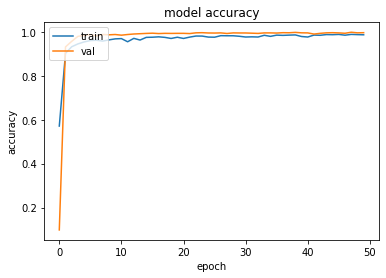

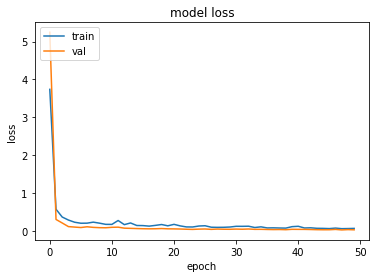

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_test, y_test, batch_size=64)

47/47 [==============================] - 1s 12ms/step - loss: 0.1049 - accuracy: 0.9877


[0.1048617884516716, 0.987666666507721]

In [ ]:
model.save_weights('model_weights.h5')

# Manual check on test set


In [ ]:
X_test[21].shape

(20, 40, 1)

In [ ]:
y_test[21]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
dd = []
dd.append(X_test[21])
nd = np.asarray(dd)
del dd

In [ ]:
nd.shape

(1, 20, 40, 1)

In [ ]:
model.predict(nd).argmax()

4

# Test on given file

In [ ]:
#data, sr = librosa.load('/content/drive/MyDrive/Stride/VICTIM-AUDIO-ACUITY-TEST.mp3')
#data = nr.reduce_noise(y=data, sr=sr)

In [ ]:
#librosa.display.waveplot(data)

In [ ]:
#file = '/content/drive/MyDrive/Stride/VICTIM-AUDIO-ACUITY-TEST.mp3'
#audio, sr = torchaudio.load(file)

In [ ]:
!pip install pydub
from pydub import AudioSegment
from pydub.silence import split_on_silence

#def match_target_amplitude(aChunk, target_dBFS):
#   ''' Normalize given audio chunk '''
#    change_in_dBFS = target_dBFS - aChunk.dBFS
#    return aChunk.apply_gain(change_in_dBFS)

#song = AudioSegment.from_mp3(file)

In [ ]:
#song

In [ ]:
'''
chunks = split_on_silence (
    # Use the loaded audio.
    song, 
    # Specify that a silent chunk must be at least 2 seconds or 2000 ms long.
    min_silence_len = 600,
    # Consider a chunk silent if it's quieter than -16 dBFS.
    # (You may want to adjust this parameter.)
    silence_thresh = -40
)
'''

"\nchunks = split_on_silence (\n    # Use the loaded audio.\n    song, \n    # Specify that a silent chunk must be at least 2 seconds or 2000 ms long.\n    min_silence_len = 600,\n    # Consider a chunk silent if it's quieter than -16 dBFS.\n    # (You may want to adjust this parameter.)\n    silence_thresh = -40\n)\n"

In [ ]:
#chunks[1].export("filename.wav", format="wav") #to save as mp3/mp4

In [ ]:
#for i in range(len(chunks)):
# chunks[i].export(f"new_data/{i}.wav", format="wav")

#del chunks1

In [ ]:
# saving after filtering data
'''
p=0
chunks1 = []
for i in range(len(chunks)):
  if chunks[i].duration_seconds < 1:
    chunks1.append(chunks[i])
    chunks[i].export(f"new_data1/{p}.wav", format="wav")
    p += 1
  #print(i,chunks[i].duration_seconds)
  '''

'\np=0\nchunks1 = []\nfor i in range(len(chunks)):\n  if chunks[i].duration_seconds < 1:\n    chunks1.append(chunks[i])\n    chunks[i].export(f"new_data1/{p}.wav", format="wav")\n    p += 1\n  #print(i,chunks[i].duration_seconds)\n  '

In [ ]:
label = [2,3,4,5,2,3,5,4,2,5,7,9,5,3,5,8,0,5,3,5,9,3,3,4,5,4,4,5,4,2,5,5,3,3,3,3,2,4,2,3,5,4,4,7,2,7,4,2,0,3,5,0,4,5,6,1,5,8,7,4,3,3,3,5,5,4,2]


In [ ]:
'''
chunk = []

for i in range(81):
  chunk_element = AudioSegment.from_mp3(f'/content/drive/MyDrive/Stride/new_data1/{i}.wav')
  if(i!=8 and i!=14 and i!=16 and i!=20 and i!=22 and i!=34 and i!=40 and i!=44 and i!=48 and i!=54 and i!=60 and i!=66 and i!=67 and i!=75 ):

    chunk.append(chunk_element)

chunk = []

for i in range(67):
  chunk_element = AudioSegment.from_mp3(f'/content/drive/MyDrive/Stride/new_data_final/{i}.wav')
  chunk.append(chunk_element)
  '''

"\nchunk = []\n\nfor i in range(81):\n  chunk_element = AudioSegment.from_mp3(f'/content/drive/MyDrive/Stride/new_data1/{i}.wav')\n  if(i!=8 and i!=14 and i!=16 and i!=20 and i!=22 and i!=34 and i!=40 and i!=44 and i!=48 and i!=54 and i!=60 and i!=66 and i!=67 and i!=75 ):\n\n    chunk.append(chunk_element)\n\nchunk = []\n\nfor i in range(67):\n  chunk_element = AudioSegment.from_mp3(f'/content/drive/MyDrive/Stride/new_data_final/{i}.wav')\n  chunk.append(chunk_element)\n  "

In [ ]:
#!zip -r new_data1.zip new_data1
#from google.colab import files
#files.download("new_data1.zip")

In [ ]:
import sys
class DataGen :

  def __init__(self,dir,num,max_len = 40):
    self.dir = dir
    self.num = num
    self.max_len = 40
    print(dir,num,max_len)


  def process_aud(self,file_path):
    max_len = self.max_len
    wave, sr = librosa.load(file_path,mono=True,sr =None)
    #wave = wave[::3]
    wave = nr.reduce_noise(y=wave, sr=sr)

    
    mfcc = librosa.feature.mfcc(wave, sr=8000)

#    if mfcc.shape[1] > 80:
#      wave, sr = librosa.load(file_path,mono=True,sr =None)
#      wave = wave[::10]
#      mfcc = librosa.feature.mfcc(wave, sr=8000)

    if mfcc.shape[1] > 40:
      wave, sr = librosa.load(file_path,mono=True,sr =None)
      wave = wave[::3]
      mfcc = librosa.feature.mfcc(wave, sr=8000)

    
    pad_width = max_len - mfcc.shape[1]
    print(pad_width)
    mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    
    fig, ax = plt.subplots()
    mfcc_data= np.swapaxes(mfcc, 0 ,1)
    cax = ax.imshow(mfcc_data, interpolation='nearest', cmap=cm.coolwarm, origin='lower')
    ax.set_title('MFCC')

    plt.show()
    librosa.display.waveplot(wave)
    return mfcc

  def __get_data(self):

    
    data = []
    
    for i in range(self.num):
      file_path = f'/content/{self.dir}/{i}.wav'
      data.append(self.process_aud(file_path))
      
      sys.stdout.write("\rDoing thing %i" % i)
      sys.stdout.flush()
      print(file_path)
    
    return np.asarray(data)

  def get_data(self):

    data = self.__get_data()
    
    return data

In [ ]:
dataset_new = DataGen('/drive/MyDrive/Stride/new_data_final',67,40)

/drive/MyDrive/Stride/new_data_final 67 40


16


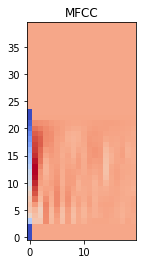

Doing thing 0/content//drive/MyDrive/Stride/new_data_final/0.wav
15


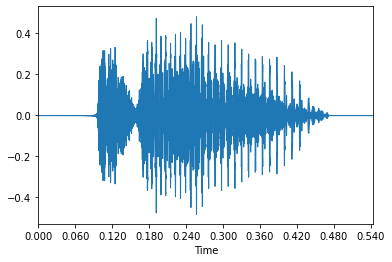

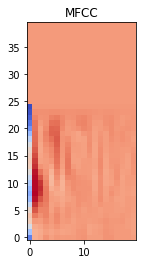

Doing thing 1/content//drive/MyDrive/Stride/new_data_final/1.wav
17


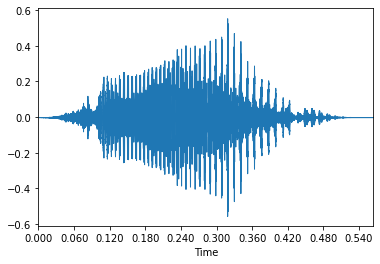

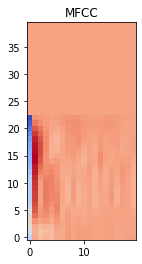

Doing thing 2/content//drive/MyDrive/Stride/new_data_final/2.wav
15


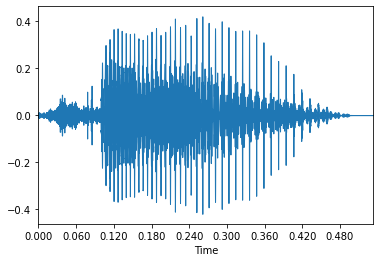

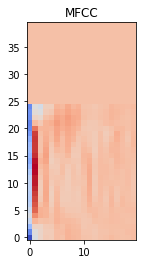

Doing thing 3/content//drive/MyDrive/Stride/new_data_final/3.wav
16


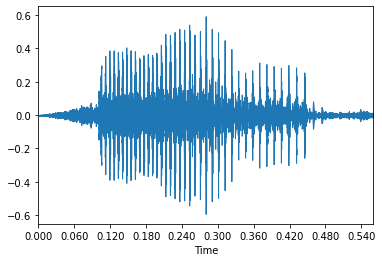

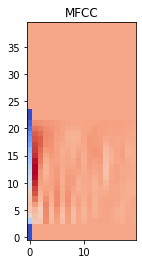

Doing thing 4/content//drive/MyDrive/Stride/new_data_final/4.wav
15


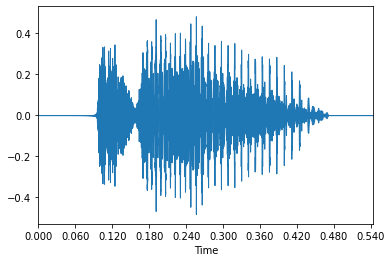

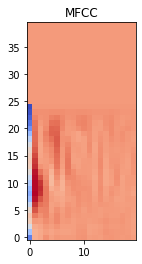

Doing thing 5/content//drive/MyDrive/Stride/new_data_final/5.wav
16


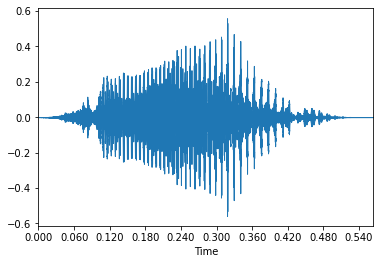

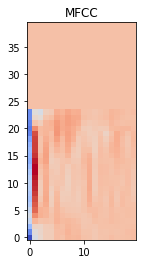

Doing thing 6/content//drive/MyDrive/Stride/new_data_final/6.wav
16


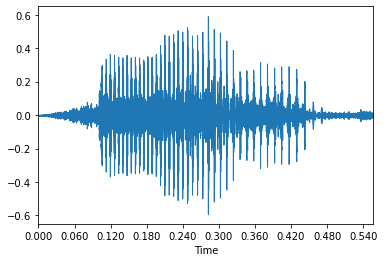

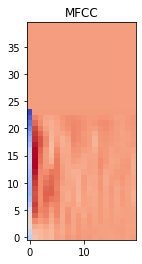

Doing thing 7/content//drive/MyDrive/Stride/new_data_final/7.wav
16


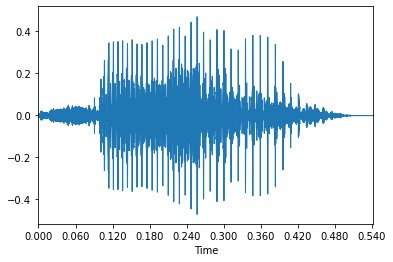

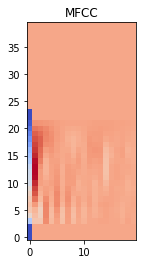

Doing thing 8/content//drive/MyDrive/Stride/new_data_final/8.wav
16


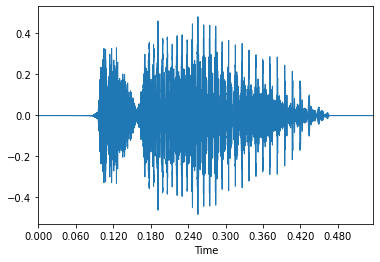

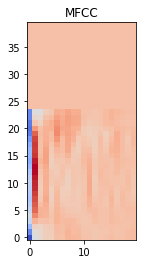

Doing thing 9/content//drive/MyDrive/Stride/new_data_final/9.wav
7


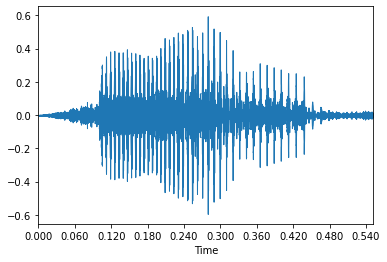

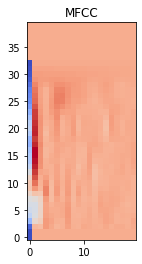

Doing thing 10/content//drive/MyDrive/Stride/new_data_final/10.wav
9


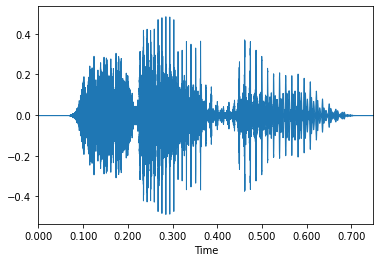

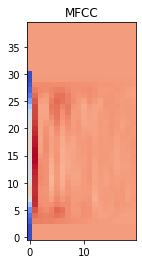

Doing thing 11/content//drive/MyDrive/Stride/new_data_final/11.wav
15


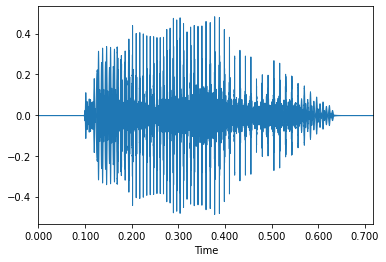

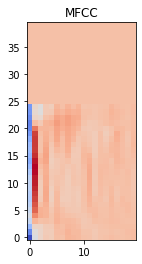

Doing thing 12/content//drive/MyDrive/Stride/new_data_final/12.wav
15


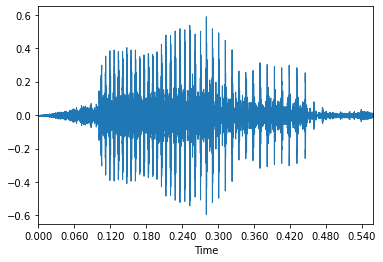

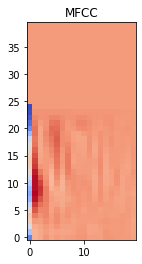

Doing thing 13/content//drive/MyDrive/Stride/new_data_final/13.wav
16


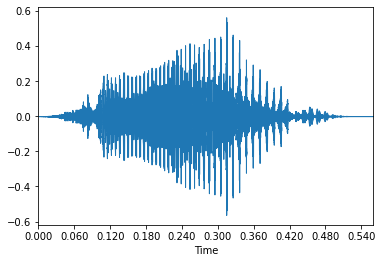

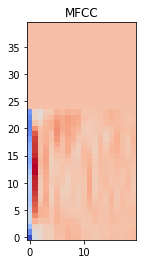

Doing thing 14/content//drive/MyDrive/Stride/new_data_final/14.wav
17


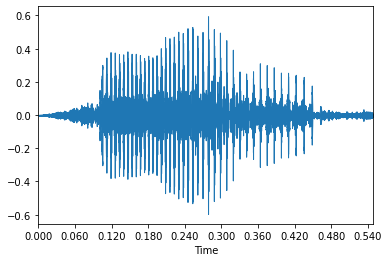

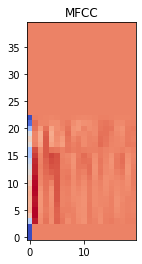

Doing thing 15/content//drive/MyDrive/Stride/new_data_final/15.wav
8


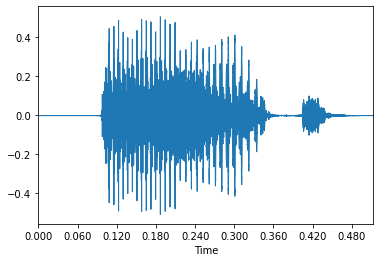

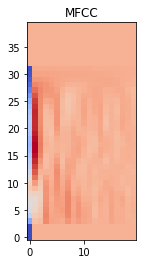

Doing thing 16/content//drive/MyDrive/Stride/new_data_final/16.wav
16


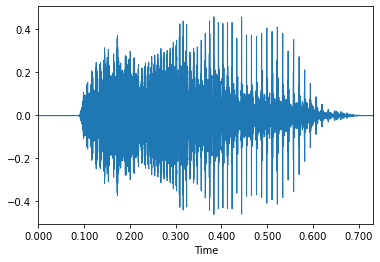

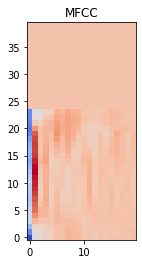

Doing thing 17/content//drive/MyDrive/Stride/new_data_final/17.wav
15


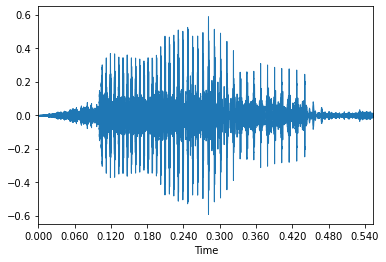

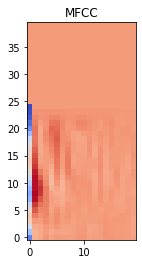

Doing thing 18/content//drive/MyDrive/Stride/new_data_final/18.wav
16


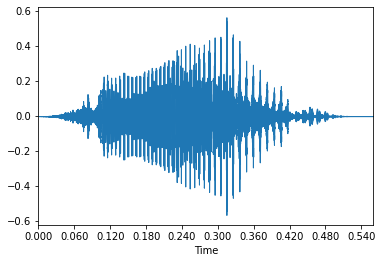

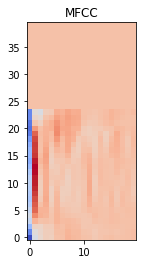

Doing thing 19/content//drive/MyDrive/Stride/new_data_final/19.wav
9


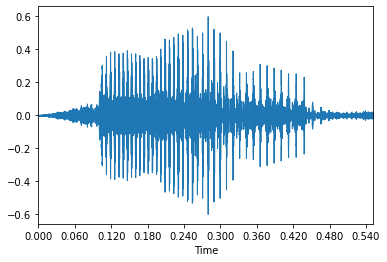

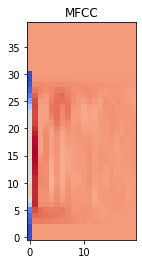

Doing thing 20/content//drive/MyDrive/Stride/new_data_final/20.wav
15


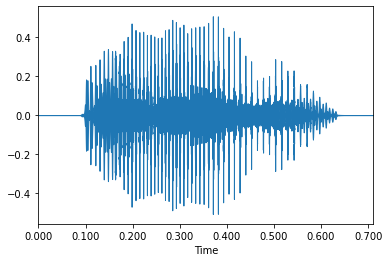

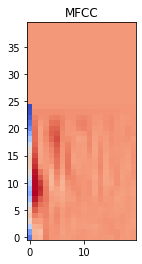

Doing thing 21/content//drive/MyDrive/Stride/new_data_final/21.wav
15


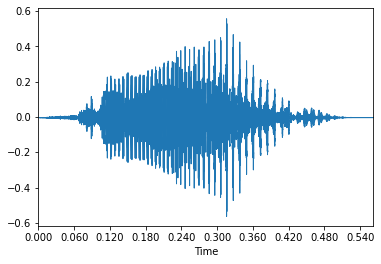

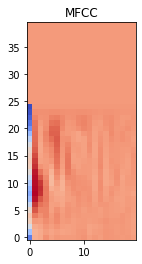

Doing thing 22/content//drive/MyDrive/Stride/new_data_final/22.wav
17


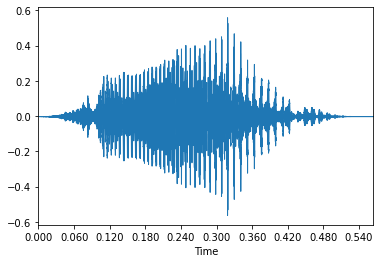

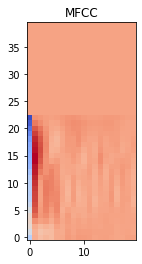

Doing thing 23/content//drive/MyDrive/Stride/new_data_final/23.wav
15


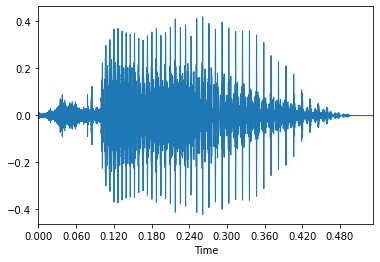

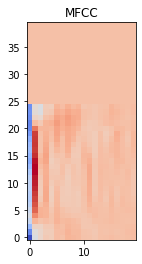

Doing thing 24/content//drive/MyDrive/Stride/new_data_final/24.wav
16


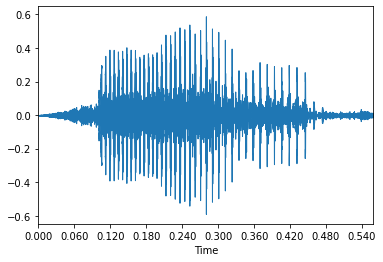

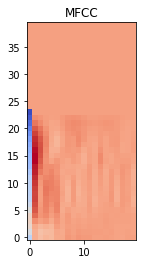

Doing thing 25/content//drive/MyDrive/Stride/new_data_final/25.wav
17


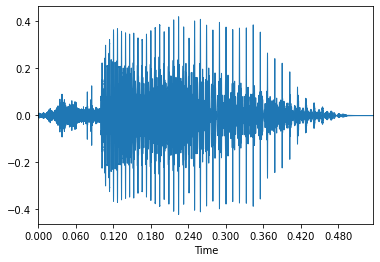

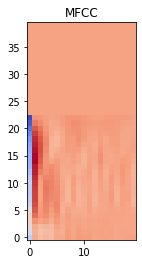

Doing thing 26/content//drive/MyDrive/Stride/new_data_final/26.wav
16


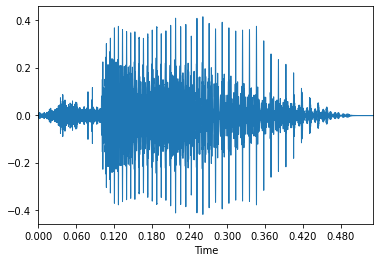

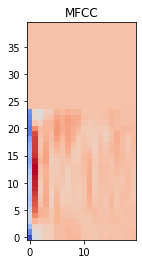

Doing thing 27/content//drive/MyDrive/Stride/new_data_final/27.wav
16


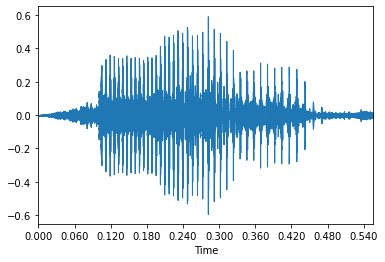

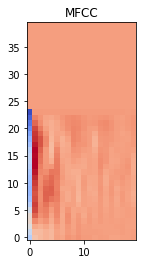

Doing thing 28/content//drive/MyDrive/Stride/new_data_final/28.wav
16


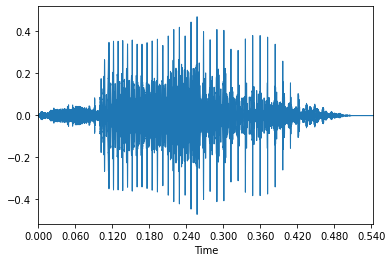

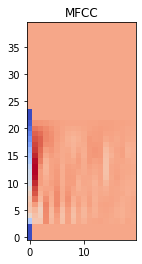

Doing thing 29/content//drive/MyDrive/Stride/new_data_final/29.wav
16


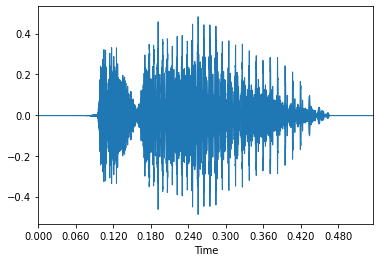

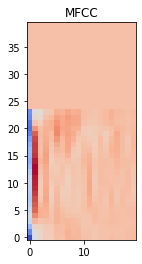

Doing thing 30/content//drive/MyDrive/Stride/new_data_final/30.wav
15


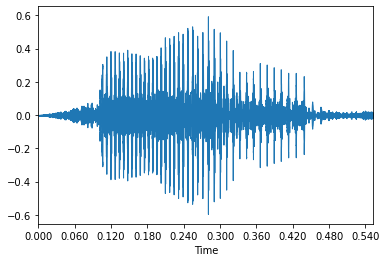

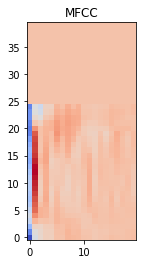

Doing thing 31/content//drive/MyDrive/Stride/new_data_final/31.wav
15


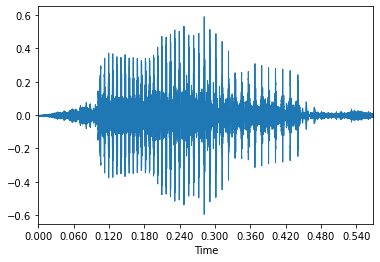

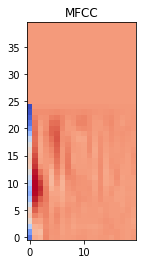

Doing thing 32/content//drive/MyDrive/Stride/new_data_final/32.wav
15


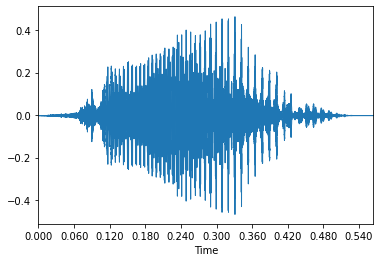

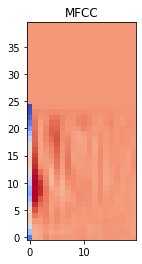

Doing thing 33/content//drive/MyDrive/Stride/new_data_final/33.wav
15


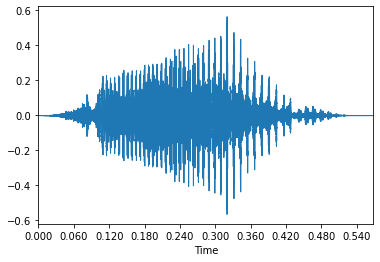

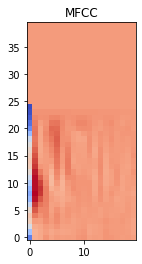

Doing thing 34/content//drive/MyDrive/Stride/new_data_final/34.wav
15


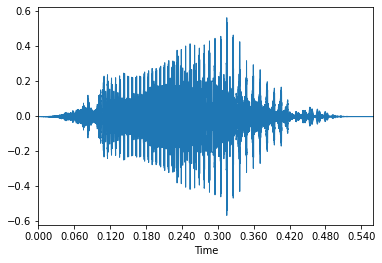

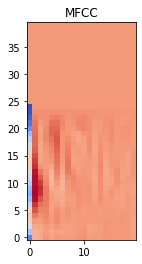

Doing thing 35/content//drive/MyDrive/Stride/new_data_final/35.wav
16


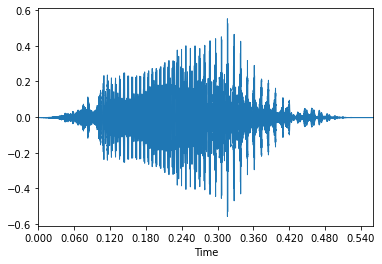

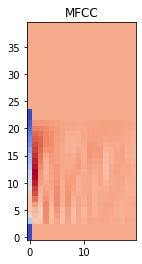

Doing thing 36/content//drive/MyDrive/Stride/new_data_final/36.wav
17


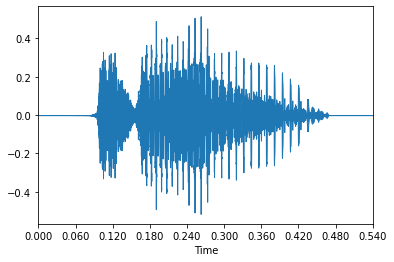

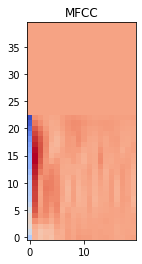

Doing thing 37/content//drive/MyDrive/Stride/new_data_final/37.wav
16


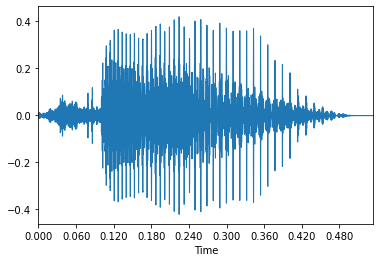

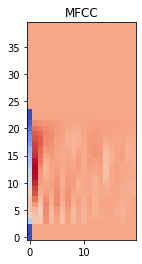

Doing thing 38/content//drive/MyDrive/Stride/new_data_final/38.wav
15


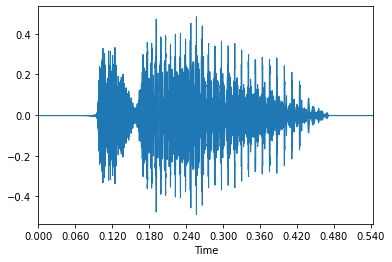

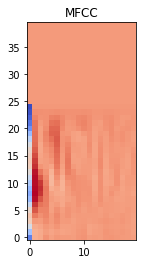

Doing thing 39/content//drive/MyDrive/Stride/new_data_final/39.wav
16


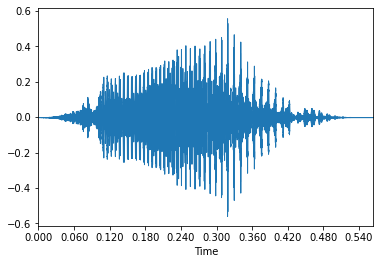

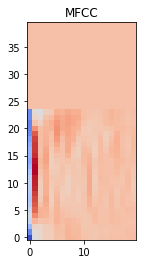

Doing thing 40/content//drive/MyDrive/Stride/new_data_final/40.wav
16


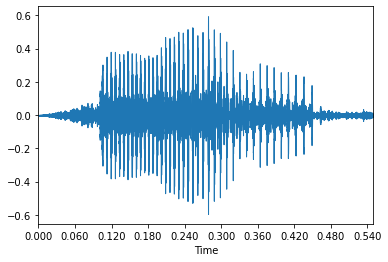

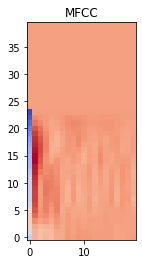

Doing thing 41/content//drive/MyDrive/Stride/new_data_final/41.wav
16


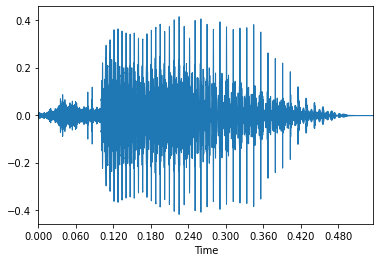

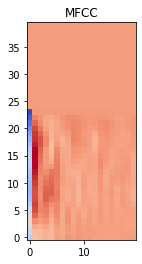

Doing thing 42/content//drive/MyDrive/Stride/new_data_final/42.wav
7


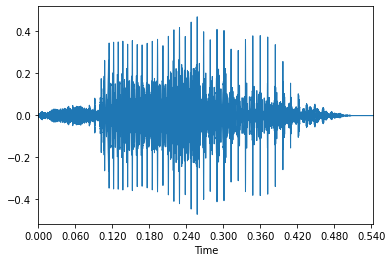

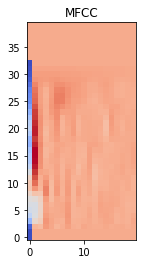

Doing thing 43/content//drive/MyDrive/Stride/new_data_final/43.wav
16


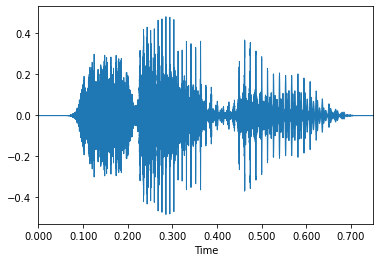

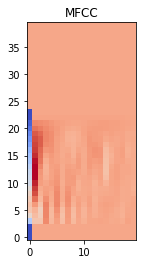

Doing thing 44/content//drive/MyDrive/Stride/new_data_final/44.wav
7


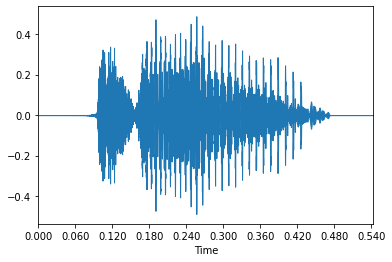

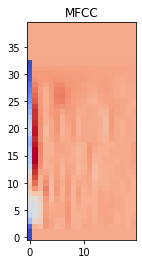

Doing thing 45/content//drive/MyDrive/Stride/new_data_final/45.wav
16


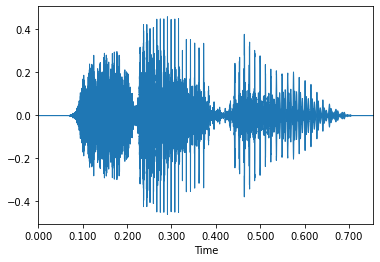

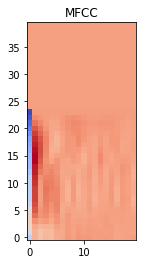

Doing thing 46/content//drive/MyDrive/Stride/new_data_final/46.wav
16


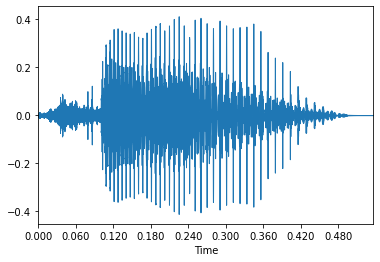

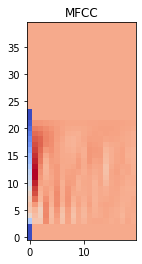

Doing thing 47/content//drive/MyDrive/Stride/new_data_final/47.wav
7


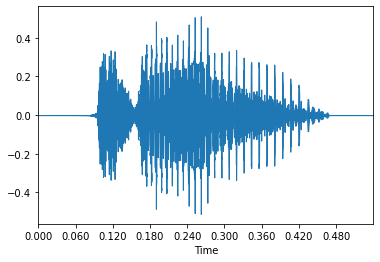

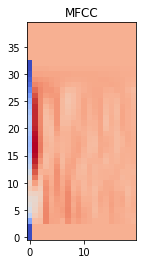

Doing thing 48/content//drive/MyDrive/Stride/new_data_final/48.wav
15


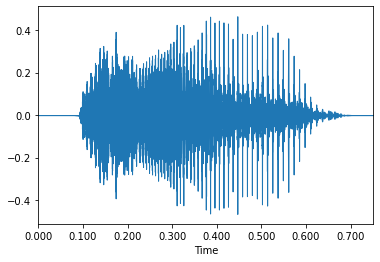

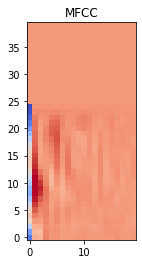

Doing thing 49/content//drive/MyDrive/Stride/new_data_final/49.wav
16


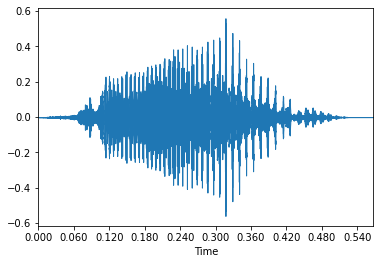

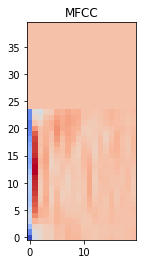

Doing thing 50/content//drive/MyDrive/Stride/new_data_final/50.wav
8


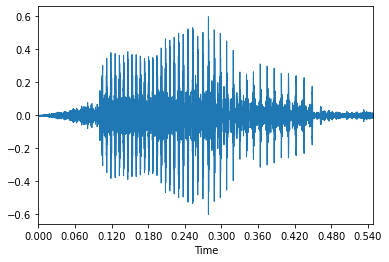

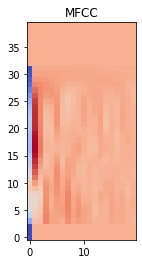

Doing thing 51/content//drive/MyDrive/Stride/new_data_final/51.wav
16


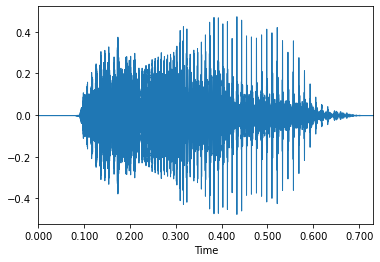

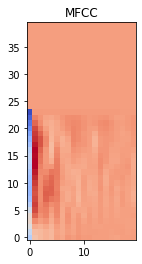

Doing thing 52/content//drive/MyDrive/Stride/new_data_final/52.wav
16


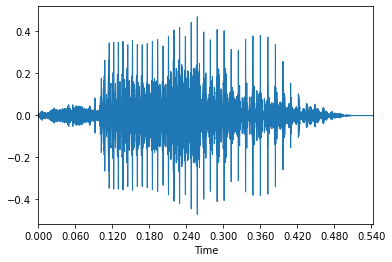

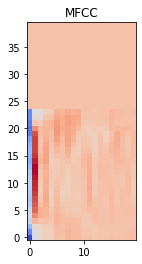

Doing thing 53/content//drive/MyDrive/Stride/new_data_final/53.wav
12


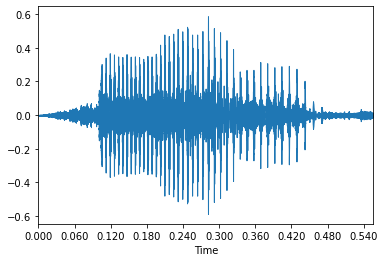

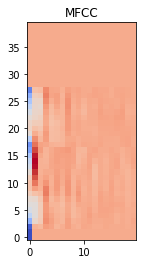

Doing thing 54/content//drive/MyDrive/Stride/new_data_final/54.wav
13


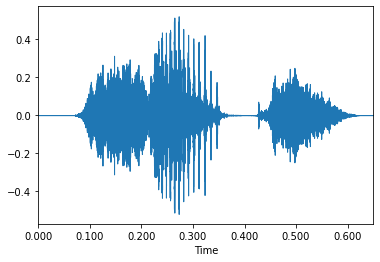

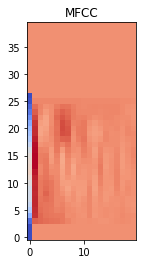

Doing thing 55/content//drive/MyDrive/Stride/new_data_final/55.wav
16


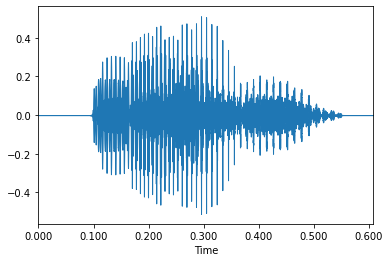

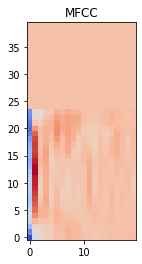

Doing thing 56/content//drive/MyDrive/Stride/new_data_final/56.wav
17


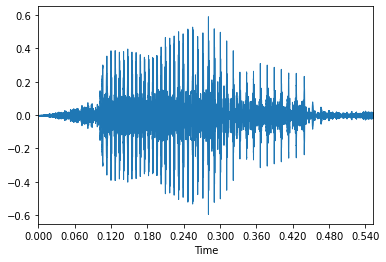

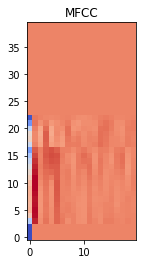

Doing thing 57/content//drive/MyDrive/Stride/new_data_final/57.wav
7


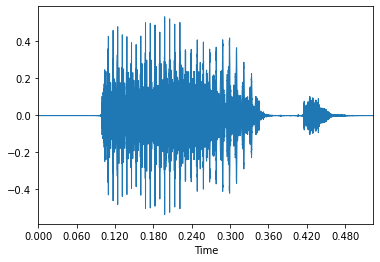

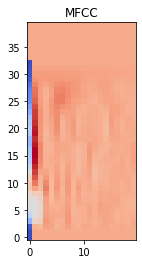

Doing thing 58/content//drive/MyDrive/Stride/new_data_final/58.wav
16


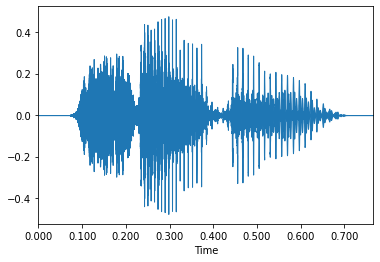

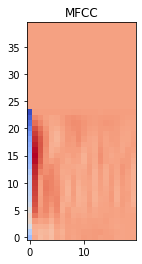

Doing thing 59/content//drive/MyDrive/Stride/new_data_final/59.wav
15


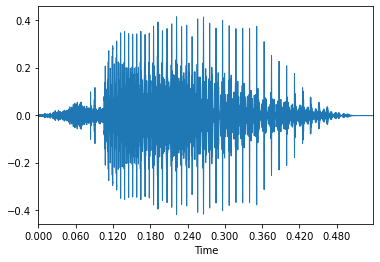

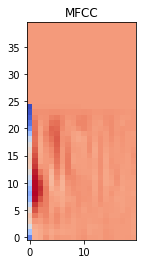

Doing thing 60/content//drive/MyDrive/Stride/new_data_final/60.wav
15


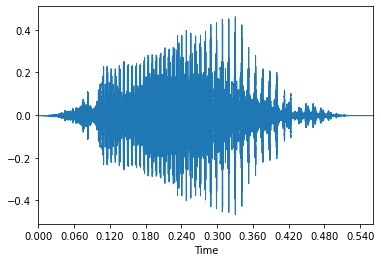

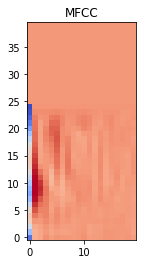

Doing thing 61/content//drive/MyDrive/Stride/new_data_final/61.wav
15


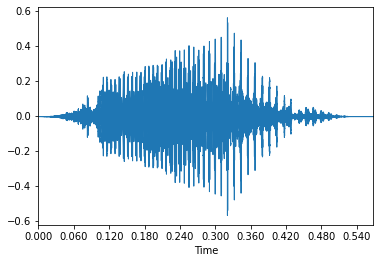

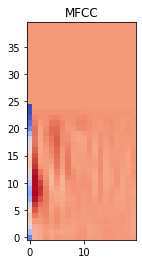

Doing thing 62/content//drive/MyDrive/Stride/new_data_final/62.wav
16


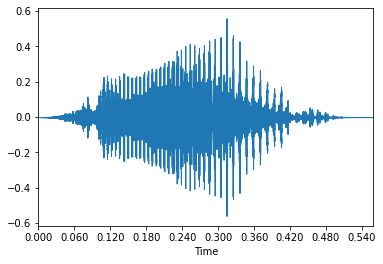

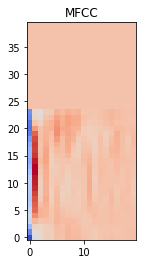

Doing thing 63/content//drive/MyDrive/Stride/new_data_final/63.wav
16


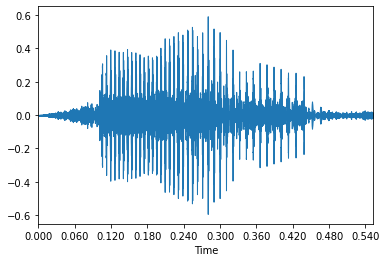

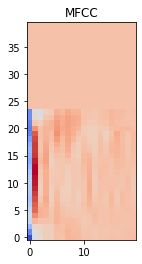

Doing thing 64/content//drive/MyDrive/Stride/new_data_final/64.wav
17


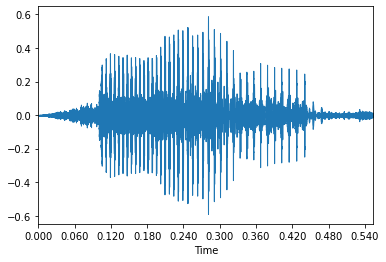

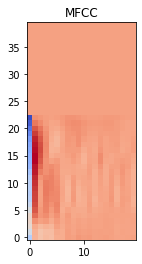

Doing thing 65/content//drive/MyDrive/Stride/new_data_final/65.wav
18


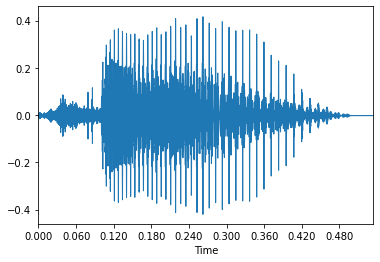

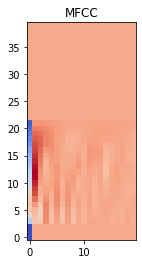

Doing thing 66/content//drive/MyDrive/Stride/new_data_final/66.wav


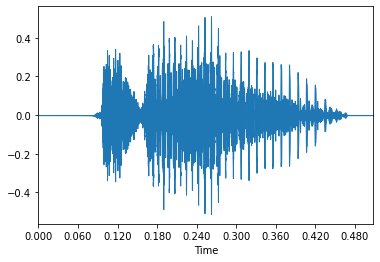

In [ ]:
data_audio = dataset_new.get_data()

In [ ]:
data_audio.shape

(67, 20, 40)

In [ ]:
data_audio_model = data_audio.reshape(data_audio.shape[0],data_audio.shape[1],data_audio.shape[2],1)

In [ ]:
final_test_preds = model.predict(data_audio_model)


In [ ]:
final_test_preds = model.predict(data_audio_model)
count = 0
for pred , lbl in zip(final_test_preds,label):
  if pred.argmax() == lbl :
    count +=1

print(count/67)

0.6268656716417911


In [ ]:
!git clone https://github.com/Jakobovski/free-spoken-digit-dataset.git

Cloning into 'free-spoken-digit-dataset'...
remote: Enumerating objects: 4185, done.
remote: Counting objects: 100% (513/513), done.
remote: Compressing objects: 100% (513/513), done.
remote: Total 4185 (delta 4), reused 501 (delta 0), pack-reused 3672
Receiving objects: 100% (4185/4185), 30.44 MiB | 23.94 MiB/s, done.
Resolving deltas: 100% (81/81), done.


In [ ]:
sou = '/content/free-spoken-digit-dataset/recordings/8_jackson_29.wav'
dataa,srrr = librosa.load(sou)
#dataa = nr.reduce_noise(y=dataa, sr=srrr)



mfccXX = librosa.feature.mfcc(dataa, sr=8000)
mfccXX.shape


AudioSegment.from_wav(sou)

In [ ]:
pad_widthX = 40 - mfccXX.shape[1]
mfccXX = np.pad(mfccXX, pad_width=((0, 0), (0, pad_widthX)), mode='constant')
mfccXX.shape
mfccXX = mfccXX.reshape(mfccXX.shape[0],mfccXX.shape[1],1)
mfccXX.shape


da = []
da.append(mfccXX)
npd = np.asarray(da)
del da

In [ ]:
testp  = model.predict(npd)
testp.argmax()

8

# STFT

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import sys
from matplotlib import cm

class DataGenerator:
  def __init__(self, dataset, max_len = 10000):
    if dataset == "AudioMNIST":
      path = 'AudioMNIST/data/'
    elif dataset == 'freespeak': path = 'free-spoken-digit-dataset/recordings'
    self.path = path
    self.dataset = dataset;
    self.max_len = max_len
    print(path)

  def process_audio(self, file, root = None):
    '''
    returns audio's mfccs: 
    '''
    max_len = self.max_len;
    if root is None:
      path = os.path.join(self.path, file)
    else:
      path = os.path.join(root, file)
    wave, sr = librosa.load(path, mono=True, sr=None)
    wave = wave[::3]
    mfcc = librosa.feature.melspectrogram(y=data, sr=sr)
    #chroma_stft = librosa.feature.chroma_stft(wave, sr=8000)
    
    pad_width = max_len - mfcc.shape[1]
    mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')

    #pad_width_chroma_stft = max_len - chroma_stft.shape[1]
    #chroma_stft = np.pad(chroma_stft, pad_width=((0, 8), (0, pad_width_chroma_stft)), mode='constant')
    return mfcc
    #wave, sr = torchaudio.load_wav(path)
    # shifting to pytorch
    # mel = torchaudio.transform.MelSpectrogram(wave, )
    # pad_width = max_len - mel.shape[1]
    # mel_padded = 

    # return mel_padded

  def __get_data(self):
    '''returns audio files after extracting mfc features and categorical labels'''
    label = []
    data = []
    dir = self.path
    i=0
    
    for (root,dirs,files) in os.walk(dir):
      for file in files:
        i+=1
        if file.endswith('.wav'):
          data.append(self.process_audio(file, root = root))
          
          label.append(file.split('_')[0][0])
          sys.stdout.write("\rDoing thing %i" % i)
          sys.stdout.flush()
    return np.asarray(data), keras.utils.to_categorical(label)

  def get_data(self, test_size = 0.1, val_size = 0.1):
    data, labels = self.__get_data()
    X, X_test, y, y_test = train_test_split(data, labels, test_size=test_size, random_state = 1)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=val_size, random_state = 2)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [ ]:
dataset = DataGenerator('AudioMNIST') 

X_train, X_val, X_test, y_train, y_val, y_test = dataset.get_data(test_size = 0.3, val_size = 0.111)

AudioMNIST/data/
Doing thing 565

In [ ]:
#model params and minor reshaping
dim = X_train.shape[1]
assert dim == 20
channels =1
X_train = X_train.reshape((X_train.shape[0], dim, 40, channels))
X_val = X_val.reshape((X_val.shape[0], dim, 40, channels))
X_test = X_test.reshape((X_test.shape[0], dim, 40, channels))
input_shape = (dim, 40, 1)
classes = 10

# Fine tuning

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import sys
from matplotlib import cm

class DataGenerator:
  def __init__(self, dataset, max_len = 40):
    if dataset == "AudioMNIST":
      path = 'AudioMNIST/data/'
    elif dataset == 'freespeak': path = 'free-spoken-digit-dataset/recordings'
    self.path = path
    self.dataset = dataset;
    self.max_len = max_len
    print(path)

  def process_audio(self, file, root = None):
    '''
    returns audio's mfccs: 
    '''
    max_len = self.max_len;
    if root is None:
      path = os.path.join(self.path, file)
    else:
      path = os.path.join(root, file)
    wave, sr = librosa.load(path, mono=True, sr=None)
    #wave = nr.reduce_noise(y=wave, sr=sr)
    #wave = wave[::3]
    mfcc = librosa.feature.mfcc(wave, sr=8000)
    #chroma_stft = librosa.feature.chroma_stft(wave, sr=8000)
    
    pad_width = max_len - mfcc.shape[1]
    mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')

    #pad_width_chroma_stft = max_len - chroma_stft.shape[1]
    #chroma_stft = np.pad(chroma_stft, pad_width=((0, 8), (0, pad_width_chroma_stft)), mode='constant')
    return mfcc
    #wave, sr = torchaudio.load_wav(path)
    # shifting to pytorch
    # mel = torchaudio.transform.MelSpectrogram(wave, )
    # pad_width = max_len - mel.shape[1]
    # mel_padded = 

    # return mel_padded

  def __get_data(self):
    '''returns audio files after extracting mfc features and categorical labels'''
    label = []
    data = []
    dir = self.path
    i=0
    
    for (root,dirs,files) in os.walk(dir):
      for file in files:
        i+=1
        if file.endswith('.wav'):
          data.append(self.process_audio(file, root = root))
          
          label.append(file.split('_')[0][0])
          sys.stdout.write("\rDoing thing %i" % i)
          sys.stdout.flush()
    return np.asarray(data), keras.utils.to_categorical(label)

  def get_data(self, test_size = 0.1, val_size = 0.1):
    data, labels = self.__get_data()
    X, X_test, y, y_test = train_test_split(data, labels, test_size=test_size, random_state = 1)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=val_size, random_state = 2)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [ ]:
dataset = DataGenerator('freespeak') 

X_train, X_val, X_test, y_train, y_val, y_test = dataset.get_data(test_size = 0.2, val_size = 0.111)

free-spoken-digit-dataset/recordings
Doing thing 50

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1713
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1778
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1843
  n_fft, y.shape[-1]


Doing thing 87

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1443
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1516
  n_fft, y.shape[-1]


Doing thing 108

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1722
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1795
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1609
  n_fft, y.shape[-1]


Doing thing 132

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1610
  n_fft, y.shape[-1]


Doing thing 150

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1664
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=2045
  n_fft, y.shape[-1]


Doing thing 198

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1720
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=2033
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=2007
  n_fft, y.shape[-1]


Doing thing 267

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1434
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1692
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1824
  n_fft, y.shape[-1]


Doing thing 291

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=2016
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1914
  n_fft, y.shape[-1]


Doing thing 307

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1873
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1892
  n_fft, y.shape[-1]


Doing thing 337

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1565
  n_fft, y.shape[-1]


Doing thing 359

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1868
  n_fft, y.shape[-1]


Doing thing 393

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1288
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1673
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1987
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1854
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1976
  n_fft, y.shape[-1]


Doing thing 437

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1876
  n_fft, y.shape[-1]


Doing thing 496

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1931
  n_fft, y.shape[-1]


Doing thing 593

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1830
  n_fft, y.shape[-1]


Doing thing 614

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1697
  n_fft, y.shape[-1]


Doing thing 635

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1601
  n_fft, y.shape[-1]


Doing thing 655

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1682
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=2034
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1801
  n_fft, y.shape[-1]


Doing thing 691

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=2023
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1886
  n_fft, y.shape[-1]


Doing thing 719

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1963
  n_fft, y.shape[-1]


Doing thing 762

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1433
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1359
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1998
  n_fft, y.shape[-1]


Doing thing 783

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1714
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=2015
  n_fft, y.shape[-1]


Doing thing 827

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1737
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=2037
  n_fft, y.shape[-1]


Doing thing 876

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1704
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1502
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1639
  n_fft, y.shape[-1]


Doing thing 933

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1919
  n_fft, y.shape[-1]


Doing thing 968

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1538
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1455
  n_fft, y.shape[-1]


Doing thing 987

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1958
  n_fft, y.shape[-1]


Doing thing 1004

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=2014
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1805
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1900
  n_fft, y.shape[-1]


Doing thing 1032

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1640
  n_fft, y.shape[-1]


Doing thing 1055

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1785
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=2001
  n_fft, y.shape[-1]


Doing thing 1077

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1403
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1632
  n_fft, y.shape[-1]


Doing thing 1099

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=2036
  n_fft, y.shape[-1]


Doing thing 1123

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1525
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1915
  n_fft, y.shape[-1]


Doing thing 1147

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1890
  n_fft, y.shape[-1]


Doing thing 1171

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1440
  n_fft, y.shape[-1]


Doing thing 1198

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=2035
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1932
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1978
  n_fft, y.shape[-1]


Doing thing 1276

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1891
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1790
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1793
  n_fft, y.shape[-1]


Doing thing 1296

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1960
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1911
  n_fft, y.shape[-1]


Doing thing 1321

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1846
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1896
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1983
  n_fft, y.shape[-1]


Doing thing 1395

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1803
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1973
  n_fft, y.shape[-1]


Doing thing 1421

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1906
  n_fft, y.shape[-1]


Doing thing 1444

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1806
  n_fft, y.shape[-1]


Doing thing 1473

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1760
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1997
  n_fft, y.shape[-1]


Doing thing 1523

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1880
  n_fft, y.shape[-1]


Doing thing 1567

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1807
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1936
  n_fft, y.shape[-1]


Doing thing 1603

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=2020
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1531
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1742
  n_fft, y.shape[-1]


Doing thing 1627

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1650
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1870
  n_fft, y.shape[-1]


Doing thing 1643

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1149
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1838
  n_fft, y.shape[-1]


Doing thing 1679

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1560
  n_fft, y.shape[-1]


Doing thing 1701

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=2039
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1943
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1556
  n_fft, y.shape[-1]


Doing thing 1722

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1772
  n_fft, y.shape[-1]


Doing thing 1751

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1970
  n_fft, y.shape[-1]


Doing thing 1814

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1781
  n_fft, y.shape[-1]


Doing thing 1884

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1634
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=2005
  n_fft, y.shape[-1]


Doing thing 1909

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1753
  n_fft, y.shape[-1]


Doing thing 1925

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1995
  n_fft, y.shape[-1]


Doing thing 1963

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1945
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=2042
  n_fft, y.shape[-1]


Doing thing 2043

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1837
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1832
  n_fft, y.shape[-1]


Doing thing 2071

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1910
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1446
  n_fft, y.shape[-1]


Doing thing 2087

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1251
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1962
  n_fft, y.shape[-1]


Doing thing 2159

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=2022
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1450
  n_fft, y.shape[-1]


Doing thing 2189

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1493
  n_fft, y.shape[-1]


Doing thing 2215

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1968
  n_fft, y.shape[-1]


Doing thing 2249

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1965
  n_fft, y.shape[-1]


Doing thing 2277

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1858
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1542
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1475
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1903
  n_fft, y.shape[-1]


Doing thing 2320

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1850
  n_fft, y.shape[-1]


Doing thing 2381

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1788
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1705
  n_fft, y.shape[-1]


Doing thing 2401

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1381
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1763
  n_fft, y.shape[-1]


Doing thing 2417

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1988
  n_fft, y.shape[-1]


Doing thing 2437

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1259
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1399
  n_fft, y.shape[-1]


Doing thing 2463

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1710
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1953
  n_fft, y.shape[-1]


Doing thing 2489

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1774
  n_fft, y.shape[-1]


Doing thing 2507

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1749
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=2012
  n_fft, y.shape[-1]


Doing thing 2536

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1712
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1627
  n_fft, y.shape[-1]


Doing thing 2587

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1819
  n_fft, y.shape[-1]


Doing thing 2605

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1817
  n_fft, y.shape[-1]


Doing thing 2624

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1597
  n_fft, y.shape[-1]


Doing thing 2650

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1569
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1852
  n_fft, y.shape[-1]


Doing thing 2679

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=2043
  n_fft, y.shape[-1]


Doing thing 2698

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1567
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1357
  n_fft, y.shape[-1]


Doing thing 2743

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1593
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1579
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1541
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1884
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1866
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1568
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa

Doing thing 2783

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1761
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1813
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1913
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1547
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1148
  n_fft, y.shape[-1]


Doing thing 2817

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1302
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=2027
  n_fft, y.shape[-1]


Doing thing 2851

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1842
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=2044
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1833
  n_fft, y.shape[-1]


Doing thing 2868

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1296
  n_fft, y.shape[-1]


Doing thing 2948

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1410
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1295
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1294
  n_fft, y.shape[-1]


Doing thing 3000

In [ ]:
#model params and minor reshaping
dim = X_train.shape[1]
assert dim == 20
channels =1
X_train = X_train.reshape((X_train.shape[0], dim, 40, channels))
X_val = X_val.reshape((X_val.shape[0], dim, 40, channels))
X_test = X_test.reshape((X_test.shape[0], dim, 40, channels))
input_shape = (dim, 40, 1)
classes = 10

In [ ]:
#import keras
#from keras.optimizers import Adam
mean = np.mean(X_train)
X_train -= mean
X_val -=  mean
X_test -= mean

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=20, 
                    validation_data=(X_val, y_val), verbose = 1)

Epoch 1/20
67/67 [==============================] - 1s 18ms/step - loss: 5.7124 - accuracy: 0.2925 - val_loss: 8.1893 - val_accuracy: 0.1049
Epoch 2/20
67/67 [==============================] - 1s 17ms/step - loss: 3.9382 - accuracy: 0.4684 - val_loss: 3.4678 - val_accuracy: 0.4757
Epoch 3/20
67/67 [==============================] - 1s 17ms/step - loss: 3.5228 - accuracy: 0.5354 - val_loss: 3.6355 - val_accuracy: 0.4869
Epoch 4/20
67/67 [==============================] - 1s 17ms/step - loss: 3.2422 - accuracy: 0.5973 - val_loss: 3.1191 - val_accuracy: 0.5993
Epoch 5/20
67/67 [==============================] - 1s 17ms/step - loss: 3.0984 - accuracy: 0.6104 - val_loss: 3.0562 - val_accuracy: 0.6479
Epoch 6/20
67/67 [==============================] - 1s 17ms/step - loss: 3.0619 - accuracy: 0.6498 - val_loss: 2.8778 - val_accuracy: 0.6517
Epoch 7/20
67/67 [==============================] - 1s 17ms/step - loss: 3.0478 - accuracy: 0.6587 - val_loss: 2.6846 - val_accuracy: 0.7416
Epoch 8/20
67

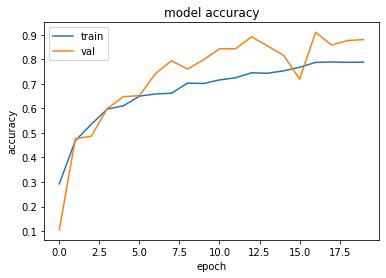

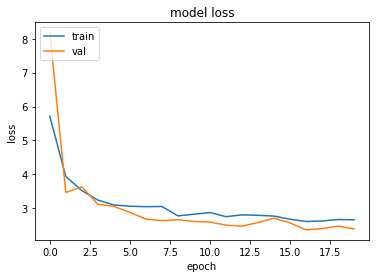

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_test, y_test, batch_size=64)

10/10 [==============================] - 0s 8ms/step - loss: 2.3682 - accuracy: 0.9100


[2.368234395980835, 0.9100000262260437]

In [ ]:
model.save('finetuned_model')
!zip -r finetuned_model.zip finetuned_model
from google.colab import files
files.download("finetuned_model.zip")

INFO:tensorflow:Assets written to: finetuned_model/assets
  adding: finetuned_model/ (stored 0%)
  adding: finetuned_model/variables/ (stored 0%)
  adding: finetuned_model/variables/variables.index (deflated 74%)
  adding: finetuned_model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: finetuned_model/keras_metadata.pb (deflated 94%)
  adding: finetuned_model/saved_model.pb (deflated 90%)
  adding: finetuned_model/assets/ (stored 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# KNN

In [ ]:
from keras.models import Model
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
new_model=Model(inputs=model.input,outputs=model.get_layer(index = 20).output)
#Let's obtain the Input Representations
#train_x=new_model.predict(X_Train)
#X_test=X_test.reshape(X_test.shape[0],28,28,1)
#test_x=new_model.predict(X_test)
#Convert back the labels
#train_y=[ np.where(r==1)[0][0] for r in y_train ]
#We are now going to have a single row for each example
#train_x=train_x.reshape(42000,5*5*64)
#test_x=test_x.reshape(28000,5*5*64)

In [ ]:
train_x=new_model.predict(X_train)


In [ ]:
test_x = new_model.predict(X_test)

In [ ]:
train_y = [np.where(r==1)[0][0] for r in y_train ]

In [ ]:
test_y = [np.where(r==1)[0][0] for r in y_test]

In [ ]:
train_x=train_x.reshape(train_x.shape[0],train_x.shape[1]*train_x.shape[2]*train_x.shape[3])
test_x=test_x.reshape(test_x.shape[0],test_x.shape[1]*test_x.shape[2]*test_x.shape[3])

In [ ]:
neigh=KNeighborsClassifier(n_neighbors=4)

In [ ]:
neigh.fit(train_x,train_y)
neigh.score(test_x,test_y)


0.987

In [ ]:
data_audio_x = new_model.predict(data_audio)

In [ ]:
data_audio_x_knn = data_audio_x.reshape(data_audio_x.shape[0],data_audio_x.shape[1]*data_audio_x.shape[2]*data_audio_x.shape[3])

In [ ]:
neigh.score(data_audio_x_knn,label)

0.40298507462686567

# SVM

In [ ]:
from sklearn.svm import SVC
svm=SVC()


In [ ]:
svm.fit(train_x,train_y)
svm.score(test_x,test_y)


0.9976666666666667

In [ ]:
svm.score(data_audio_x_knn,label)

0.26865671641791045